# Plot Malignancy Estimation Results

Code adapted from the following repositories:

* [Kiran model](https://github.com/DIAGNijmegen/bodyct-nodule-malignancy)
* [Thijmen model](https://github.com/DIAGNijmegen/bodyct-lung-malignancy)
* [StackOverflow on right-align legend text](https://stackoverflow.com/questions/7936034/text-alignment-in-a-matplotlib-legend)

In [3]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set_style("white")
from evalutils.roc import get_bootstrapped_roc_ci_curves
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.metrics as skl_metrics

## Read Data (DLCST results)

In [7]:
## directory where results are
LOCAL_PC = False
root_dir = "W:" if LOCAL_PC else "/data/bodyct"
EXPERIMENT_DIR = f"{root_dir}/experiments/lung-malignancy-fairness-shaurya"

In [8]:
## Read DLCST results
df_results = pd.read_csv(f"{EXPERIMENT_DIR}/dlcst-preds/dlcst_thijmen_kiran_sybil_malignancy_estimation_results.csv", header=0)
df_results.head()

FileNotFoundError: [Errno 2] No such file or directory: 'W:\\experiments\\lung-malignancy-fairness-shaurya\\dlcst-preds\\dlcst_thijmen_kiran_sybil_malignancy_estimation_results.csv'

In [18]:
len(pd.unique(df_results['SeriesInstanceUID'])), len(pd.unique(df_results['PatientID']))

(599, 599)

In [3]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            599 non-null    int64  
 1   StudyDate            599 non-null    int64  
 2   SeriesInstanceUID    599 non-null    object 
 3   Age                  599 non-null    int64  
 4   Sex                  599 non-null    int64  
 5   FamilyHistoryLungCa  599 non-null    int64  
 6   Emphysema            599 non-null    int64  
 7   NoduleCountPerScan   599 non-null    int64  
 8   sybil_year1          599 non-null    float64
 9   sybil_year2          599 non-null    float64
 10  sybil_year3          599 non-null    float64
 11  sybil_year4          599 non-null    float64
 12  sybil_year5          599 non-null    float64
 13  sybil_year6          599 non-null    float64
 14  PanCan2b             599 non-null    float64
 15  Ensemble_Kiran       599 non-null    flo

In [4]:
df_results.describe()

PatientID     StudyDate         Age         Sex  FamilyHistoryLungCa  \
count   599.000000  5.990000e+02  599.000000  599.000000           599.000000   
mean   1883.756260  2.005100e+07   58.397329    1.460768             0.170284   
std    1215.815006  7.593265e+03    4.946103    0.498875             0.376196   
min       4.000000  2.004111e+07   50.000000    1.000000             0.000000   
25%     800.500000  2.005013e+07   54.000000    1.000000             0.000000   
50%    1689.000000  2.005052e+07   58.000000    1.000000             0.000000   
75%    3011.500000  2.005103e+07   62.000000    2.000000             0.000000   
max    4099.000000  2.009122e+07   75.000000    2.000000             1.000000   

        Emphysema  NoduleCountPerScan  sybil_year1  sybil_year2  sybil_year3  \
count  599.000000          599.000000   599.000000   599.000000   599.000000   
mean     0.676127            1.769616     0.025965     0.040542     0.050433   
std      0.468343            1.165421     0.080576     0.104781     0.111505   
min      0.000000            1.000000     0.000000     0.000000     0.000000   
25%      0.000000            1.000000     0.001170     0.002554     0.007835   
50%      1.000000            1.000000     0.001965     0.005733     0.010996   
75%      1.000000            2.000000     0.007145     0.020146     0.029786   
max      1.000000            9.000000     0.838213     0.903660     0.902390   

       sybil_year4  sybil_year5  sybil_year6    PanCan2b  Ensemble_Kiran  \
count   599.000000   599.000000   599.000000  599.000000    5.990000e+02   
mean      0.058651     0.067412     0.089968    0.055902    1.461987e-01   
std       0.115754     0.121409     0.135617    0.118722    2.966031e-01   
min       0.000000     0.000000     0.000000    0.000000    8.820000e-07   
25%       0.012797     0.019229     0.032957    0.002396    2.369950e-04   
50%       0.015721     0.021112     0.035951    0.007804    2.825316e-03   
75%       0.039906     0.051451     0.076318    0.044897    6.282042e-02   
max       0.914693     0.914693     0.914693    0.789437    9.988375e-01   

       thijmen_mean       label  
count    599.000000  599.000000  
mean       0.166094    0.098497  
std        0.241460    0.298235  
min        0.000574    0.000000  
25%        0.011600    0.000000  
50%        0.045436    0.000000  
75%        0.201205    0.000000  
max        0.977596    1.000000

<Axes: xlabel='Age', ylabel='Count'>

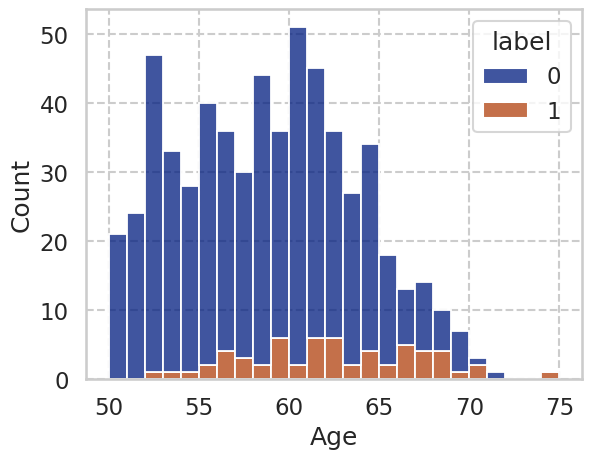

In [41]:
sns.histplot(df_results, x="Age", bins=25, hue="label", multiple='stack')

In [42]:
df_results.query('Age == 70')['label'].value_counts()

label
1    2
0    1
Name: count, dtype: int64

In [43]:
df_malignant = df_results.query('label == 1')
df_malignant.describe()

PatientID     StudyDate        Age        Sex  FamilyHistoryLungCa  \
count    59.000000  5.900000e+01  59.000000  59.000000            59.000000   
mean   2226.067797  2.006203e+07  62.000000   1.457627             0.271186   
std    1146.619783  1.472711e+04   4.856563   0.502478             0.448388   
min      62.000000  2.004112e+07  52.000000   1.000000             0.000000   
25%    1303.500000  2.005072e+07  59.000000   1.000000             0.000000   
50%    2218.000000  2.005121e+07  62.000000   1.000000             0.000000   
75%    3300.500000  2.007056e+07  66.000000   2.000000             1.000000   
max    4032.000000  2.009122e+07  75.000000   2.000000             1.000000   

       Emphysema  NoduleCountPerScan  sybil_year1  sybil_year2  sybil_year3  \
count  59.000000           59.000000    59.000000    59.000000    59.000000   
mean    0.745763            1.711864     0.145046     0.200687     0.222831   
std     0.439169            1.175187     0.179729     0.218469     0.226036   
min     0.000000            1.000000     0.000421     0.002048     0.006331   
25%     0.500000            1.000000     0.010938     0.023848     0.040202   
50%     1.000000            1.000000     0.084456     0.143517     0.172521   
75%     1.000000            2.000000     0.215565     0.306710     0.306925   
max     1.000000            7.000000     0.838213     0.903660     0.902390   

       sybil_year4  sybil_year5  sybil_year6   PanCan2b  Ensemble_Kiran  \
count    59.000000    59.000000    59.000000  59.000000       59.000000   
mean      0.240233     0.258463     0.307859   0.221539        0.698916   
std       0.228718     0.236872     0.248971   0.201549        0.336146   
min       0.010185     0.014170     0.022664   0.003140        0.000115   
25%       0.056078     0.068311     0.104660   0.050493        0.528134   
50%       0.197799     0.211975     0.276596   0.167578        0.833620   
75%       0.337119     0.365862     0.415215   0.296643        0.971705   
max       0.914693     0.914693     0.914693   0.789437        0.998838   

       thijmen_mean  label  
count     59.000000   59.0  
mean       0.616382    1.0  
std        0.273137    0.0  
min        0.007771    1.0  
25%        0.474855    1.0  
50%        0.678868    1.0  
75%        0.837449    1.0  
max        0.977596    1.0

### Define DLCST Splits
DataFrame queries for subsets. Can use this for plots and whatnot.

In [60]:
SPLIT_QUERIES = {
    "sex": {
        "male": 'Sex == 1',
        "female": 'Sex == 2' 
    },
    "family history": {
        "no": 'FamilyHistoryLungCa == 0',
        "yes": 'FamilyHistoryLungCa == 1' 
    },
    "emphysema": {
        "no": 'Emphysema == 0',
        "yes": 'Emphysema == 1' 
    },
    "age": {
        "50-55": '50 <= Age < 55',
        "55-60": '55 <= Age < 60', 
        "60-65": '60 <= Age < 65', 
        "65+": '65 <= Age', 
    },
    "age2": {
        "50-60": '50 <= Age < 60',
        "60-65": '60 <= Age < 65', 
        "65+": '65 <= Age', 
    },
    "age3": {
        "50-62": '50 <= Age < 62',
        "62+": '62 <= Age', 
    }
}

In [44]:
def get_split_dfs(df, split_by="sex", printinfo=True):
    subset_dfs = {}
    for (split, query) in SPLIT_QUERIES[split_by].items():
        subset_dfs[split] = df.query(query)
        
        if printinfo:
            mal_count = len(subset_dfs[split].query('label == 1'))
            mal_percent = 100 * (mal_count / len(subset_dfs[split]))
            print(f"{split}, n={len(subset_dfs[split])}, {mal_count} malignant ({mal_percent:.2f}%)")
    
    return subset_dfs

In [57]:
split_age = get_split_dfs(df_results, 'age')

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


In [58]:
split_age = get_split_dfs(df_results, 'age2')

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


In [61]:
split_age = get_split_dfs(df_results, 'age3')

50-62, n=435, 28 malignant (6.44%)
62+, n=164, 31 malignant (18.90%)


## ROC Plots

### Utility Code

In [46]:
## Plot settings (adapted from Kiran and Thijmen's repos)
sns.set_theme(
    "talk",
    "whitegrid",
    "dark",
    rc={"lines.linewidth": 2, "grid.linestyle": "--"},
)
color_palette = sns.color_palette("colorblind")

In [47]:
def plot_rocs(rocs, title=None, imgpath=None, plot_ci=False):
    plt.figure(figsize=(6,6))
    plt.plot([0.0, 1.0], [0.0, 1.0], "--", color="k", alpha=0.5)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xticks(np.arange(0, 1.1, 0.1), fontsize=12)  # X axis ticks in steps of 0.1
    plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)  # Y axis ticks in steps of 0.1
    plt.grid(lw=1)
    plt.xlim(-0.005,1)
    plt.ylim(0,1.005)

    for i, label in enumerate(rocs):
        roc = rocs[label]
        # roc = get_bootstrapped_roc_ci_curves(df[MODEL_TO_COL[m]].values, df[true_col].values)
        auc = skl_metrics.auc(roc.fpr_vals, roc.mean_tpr_vals)
        plt.plot(
            roc.fpr_vals, roc.mean_tpr_vals, color=color_palette[i],
            label=f"{label}: AUC = {auc:.3f} (95% CI: {roc.low_az_val:.3f} - {roc.high_az_val:.3f})",
        )
        if plot_ci:
            plt.fill_between(roc.fpr_vals, roc.low_tpr_vals, roc.high_tpr_vals, color=color_palette[i], alpha=.1)

    if title:
        plt.title(title, fontsize=14)

    leg = plt.legend(loc='lower right', fontsize=12)
    shift = max([t.get_window_extent().width for t in leg.get_texts()])
    for t in leg.get_texts():
        t.set_ha('right') # ha is alias for horizontalalignment
        t.set_position((shift - t.get_window_extent().width,0))

    if imgpath is not None:
        plt.savefig(imgpath, dpi=600)
    plt.show()

### Compare ROCs across models

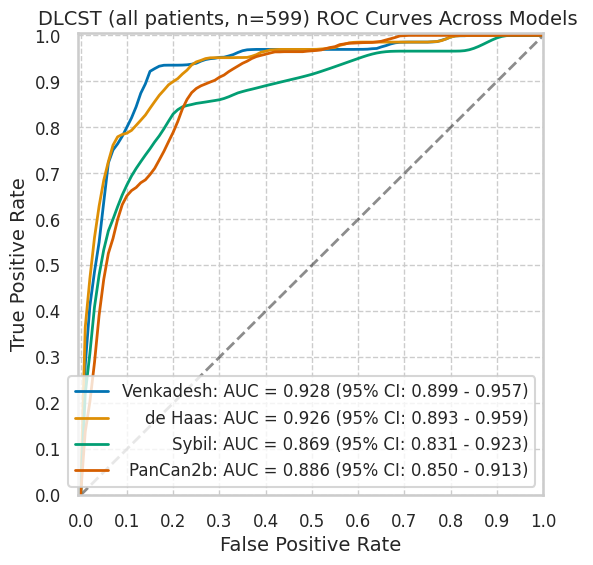

In [48]:
MODEL_TO_COL = {
    "Venkadesh": "Ensemble_Kiran",
    "de Haas": "thijmen_mean",
    "Sybil": "sybil_year1",
    "PanCan2b": "PanCan2b",
}

def rocs_models(df, true_col='label', models=["Venkadesh", "de Haas", "Sybil", "PanCan2b"], dataset_label="DLCST", subset_label="all", imgpath=None, plot_ci=False):
    rocs = {}
    for m in models:
        rocs[m] = get_bootstrapped_roc_ci_curves(df[MODEL_TO_COL[m]].values, df[true_col].values)
    
    plot_rocs(rocs, f'{dataset_label} ({subset_label} patients, n={len(df)}) ROC Curves Across Models ', imgpath, plot_ci)

rocs_models(df_results)

### Compare Model Performance For Each Split

male, n=323, 32 malignant (9.91%)
female, n=276, 27 malignant (9.78%)


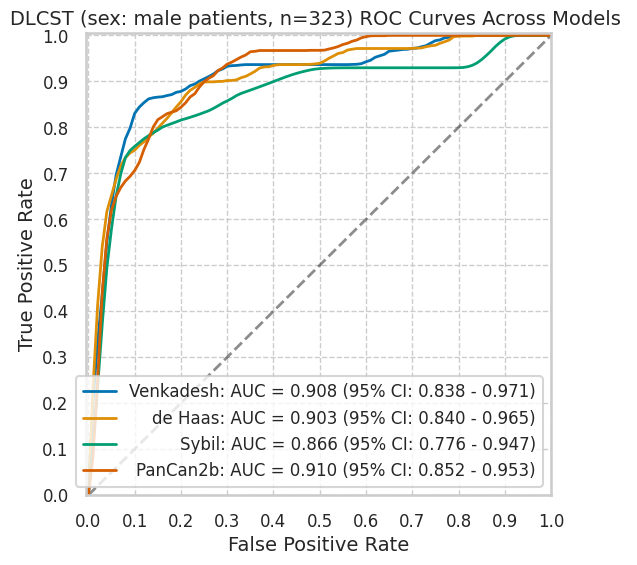

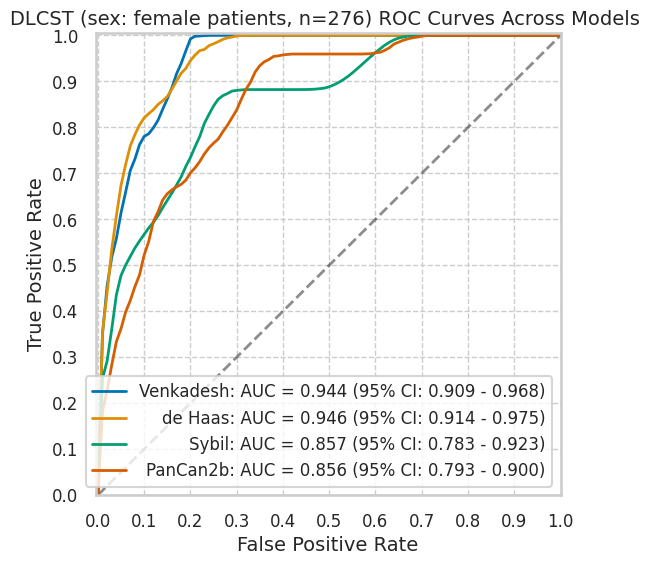

no, n=497, 43 malignant (8.65%)
yes, n=102, 16 malignant (15.69%)


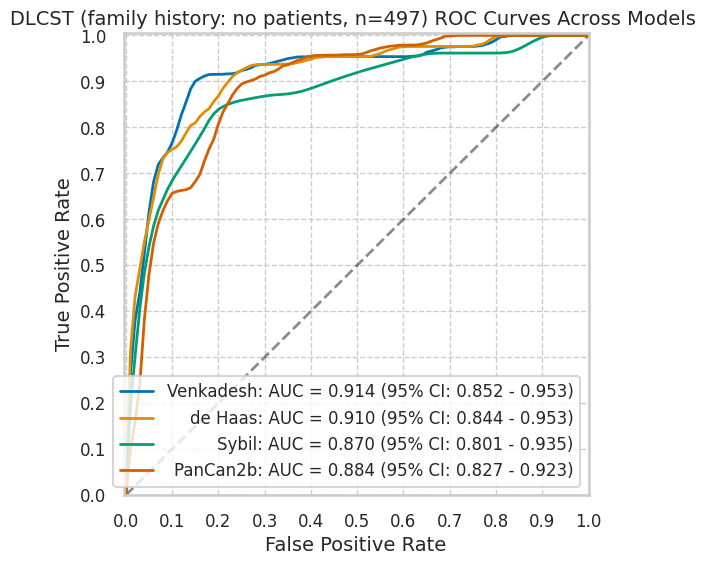

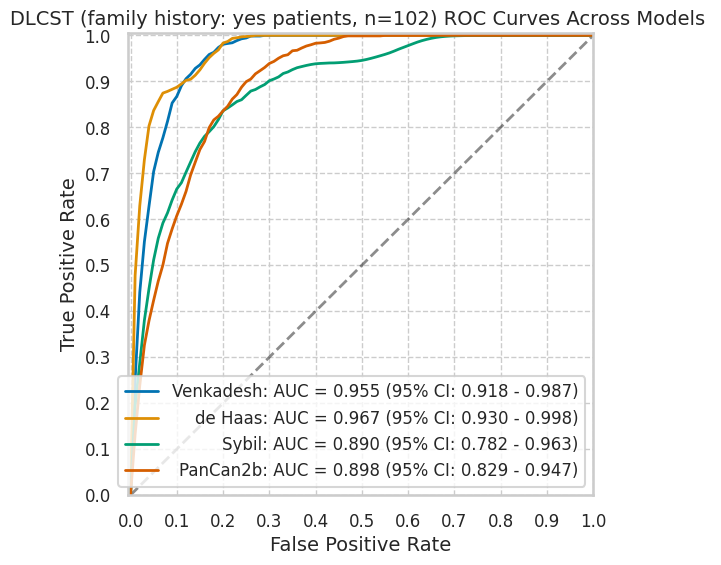

no, n=194, 15 malignant (7.73%)
yes, n=405, 44 malignant (10.86%)


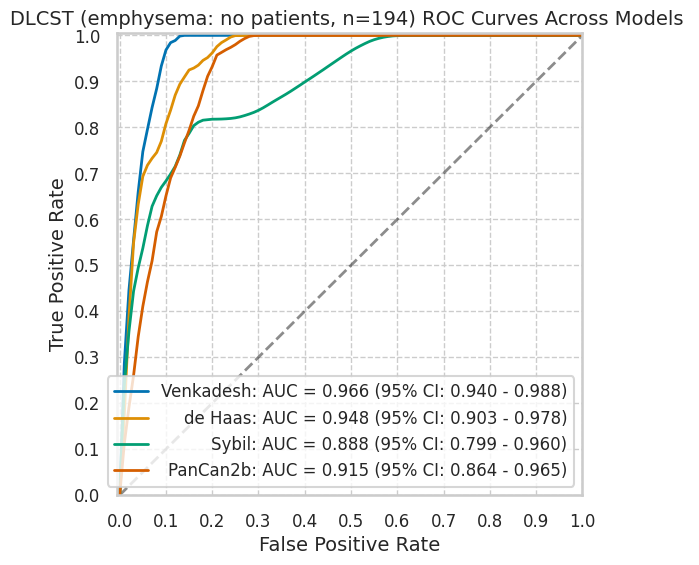

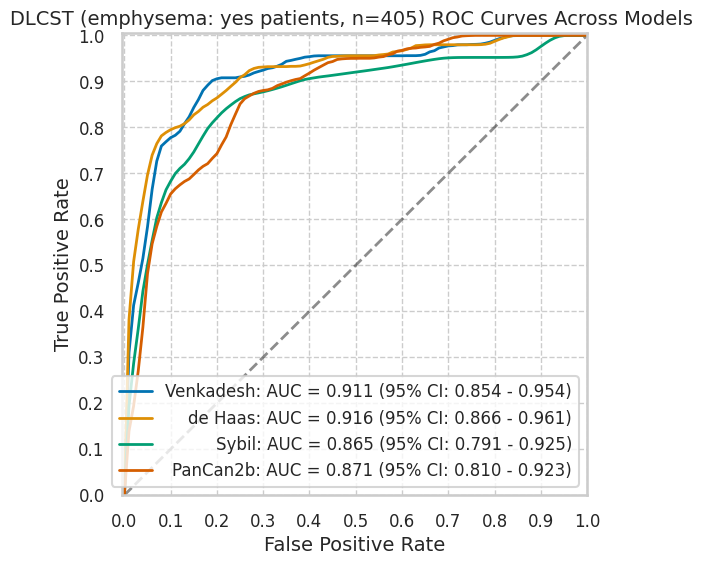

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


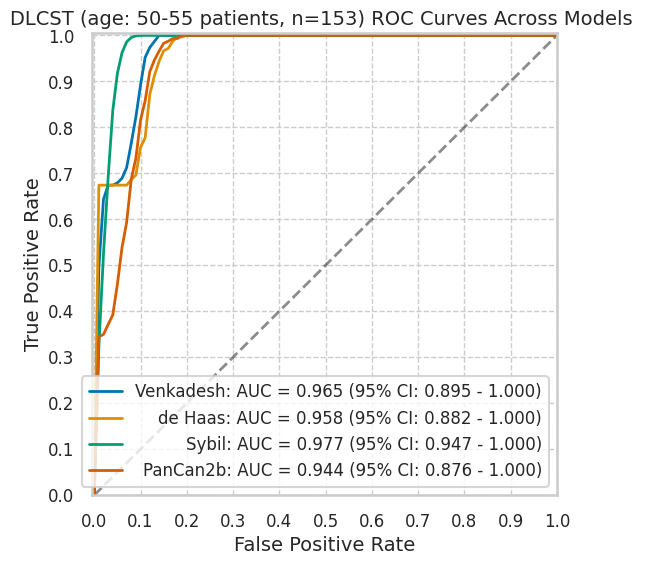

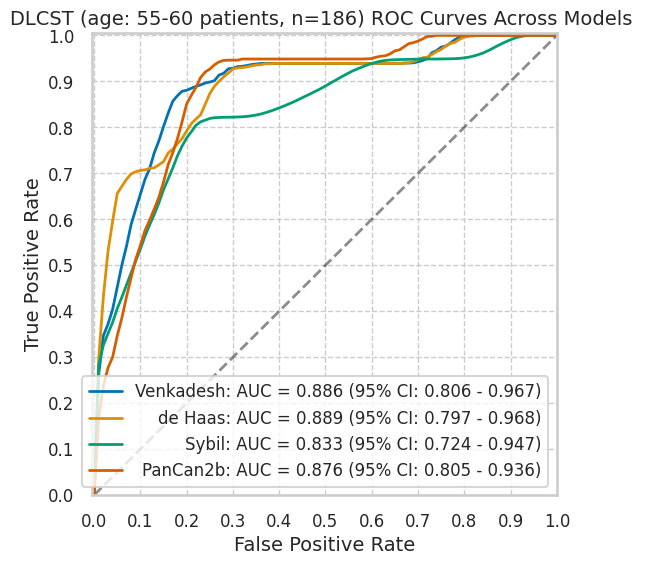

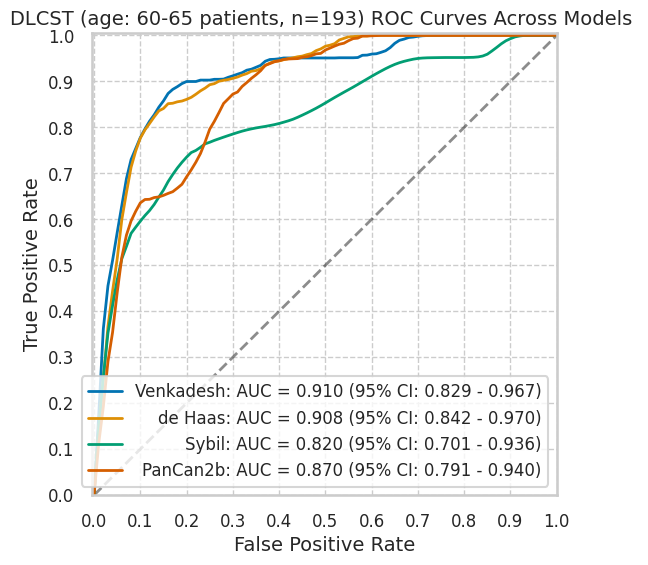

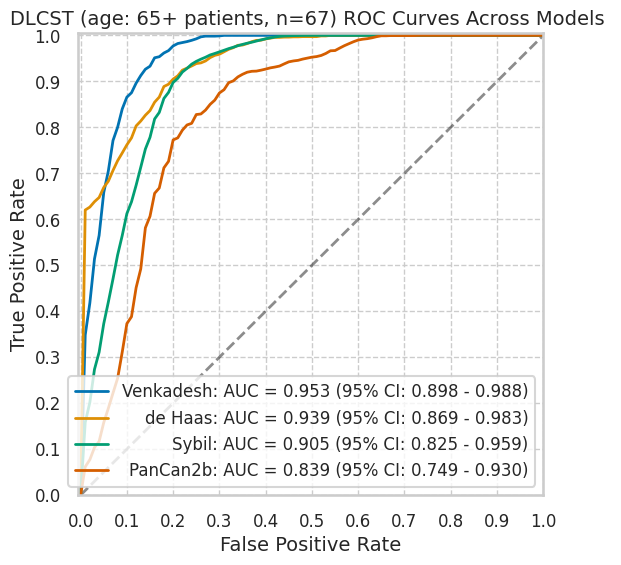

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


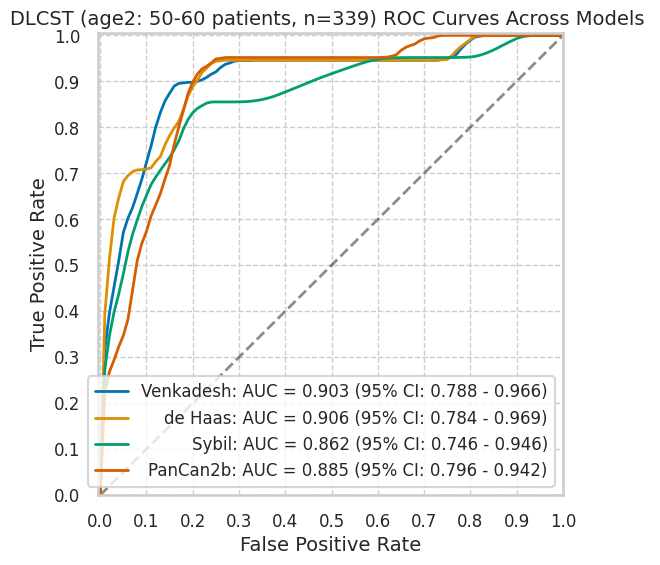

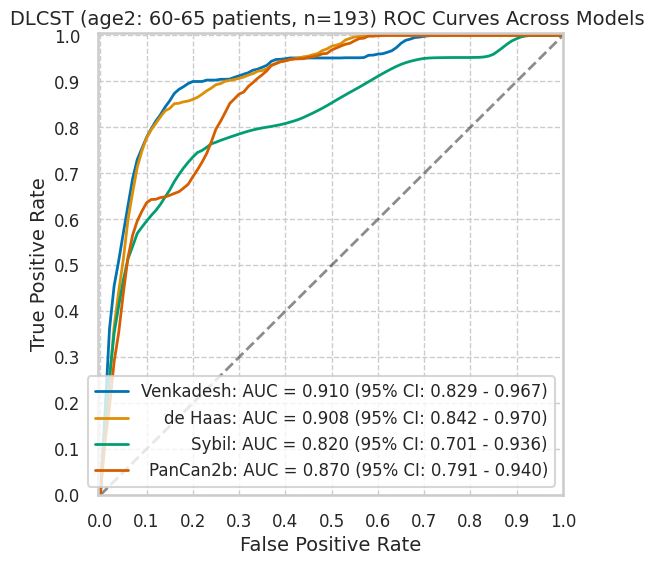

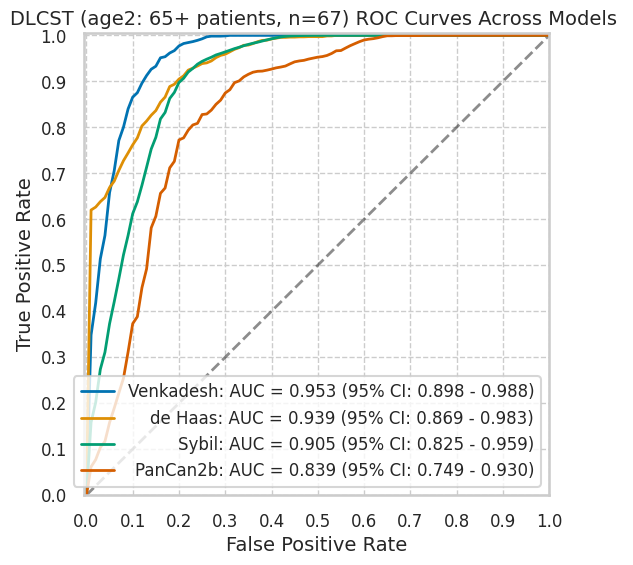

In [49]:
for split_type in SPLIT_QUERIES:
    subset_dfs = get_split_dfs(df_results, split_by=split_type)
    for split, df_sub in subset_dfs.items():
        rocs_models(df_sub, subset_label=f'{split_type}: {split}')

### Plot Splits for Same Model

In [50]:
def rocs_splits(df, split_by="sex", dataset_label="DLCST", true_col='label', model="Venkadesh", imgpath=None, plot_ci=False):
    subset_dfs = get_split_dfs(df, split_by)
    rocs = {}
    rocs['all'] = get_bootstrapped_roc_ci_curves(df[MODEL_TO_COL[model]].values, df[true_col].values)   
    for split, df_subset in subset_dfs.items():
        rocs[split] = get_bootstrapped_roc_ci_curves(df_subset[MODEL_TO_COL[model]].values, df_subset[true_col].values)
    
    plot_rocs(rocs, f'{dataset_label} (split by {split_by}) ROC Curves for {model} Model', imgpath, plot_ci)

male, n=323, 32 malignant (9.91%)
female, n=276, 27 malignant (9.78%)


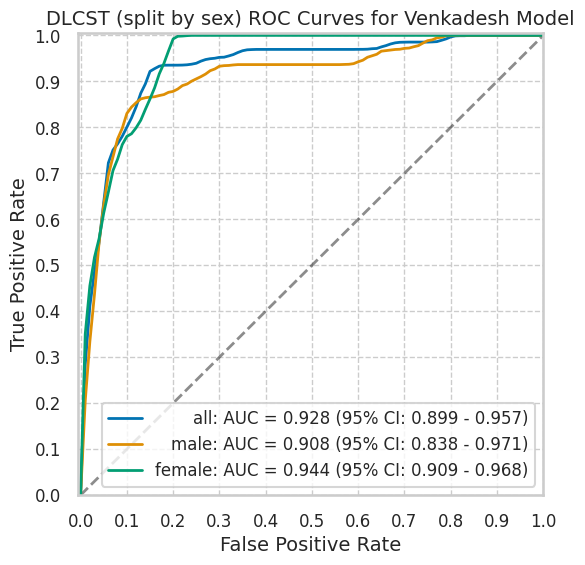

male, n=323, 32 malignant (9.91%)
female, n=276, 27 malignant (9.78%)


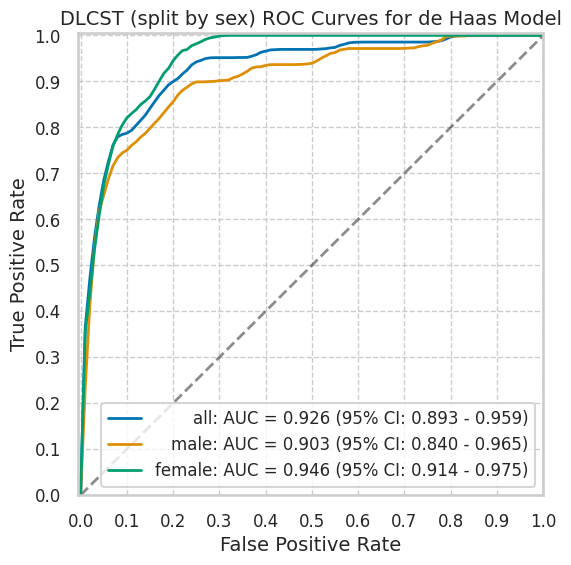

male, n=323, 32 malignant (9.91%)
female, n=276, 27 malignant (9.78%)


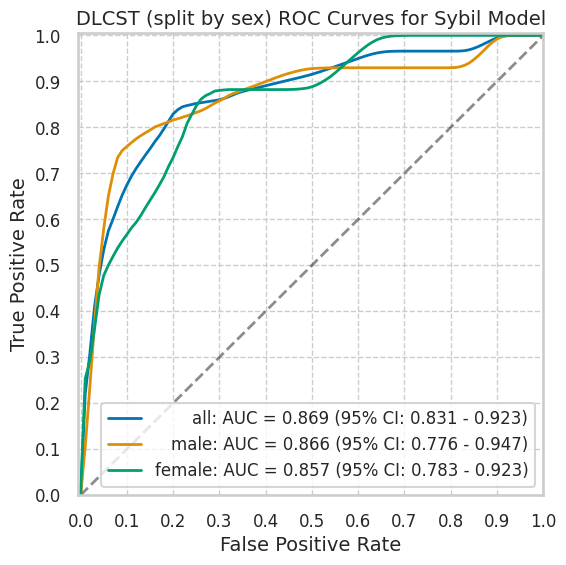

male, n=323, 32 malignant (9.91%)
female, n=276, 27 malignant (9.78%)


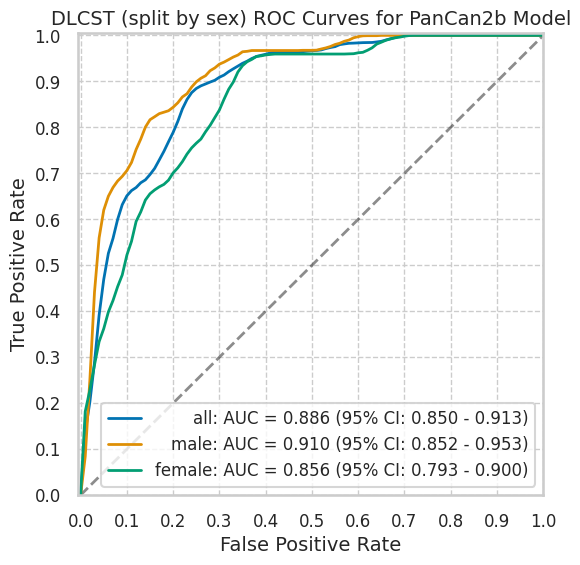

In [51]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "sex", model=m)

no, n=194, 15 malignant (7.73%)
yes, n=405, 44 malignant (10.86%)


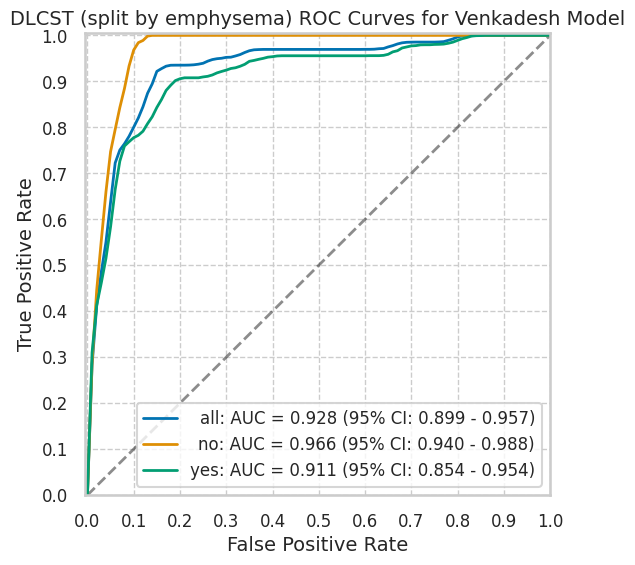

no, n=194, 15 malignant (7.73%)
yes, n=405, 44 malignant (10.86%)


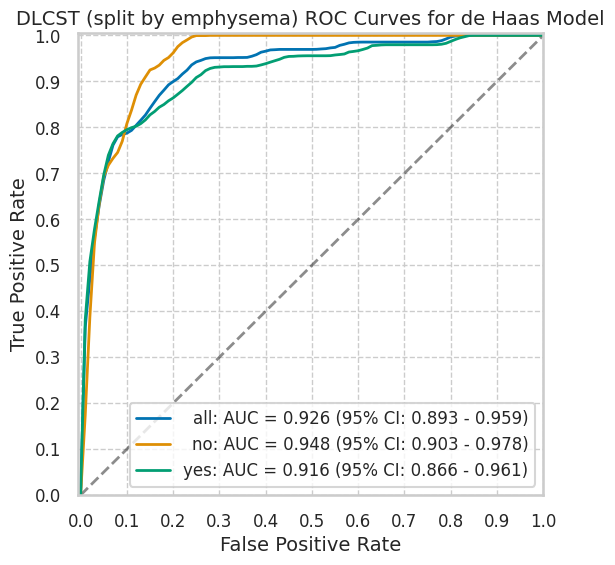

no, n=194, 15 malignant (7.73%)
yes, n=405, 44 malignant (10.86%)


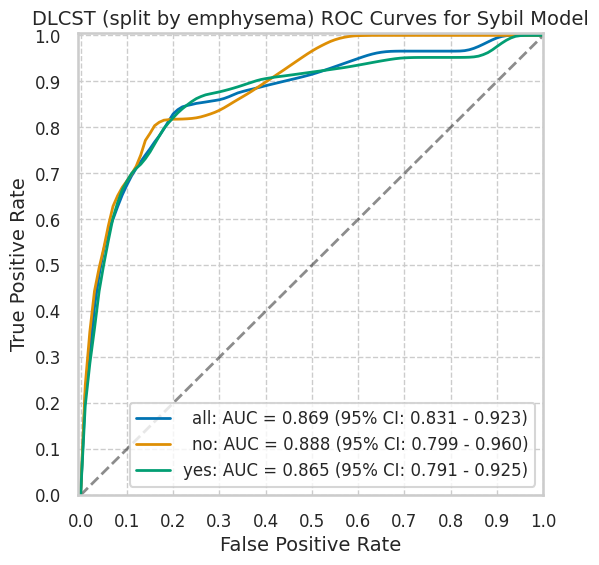

no, n=194, 15 malignant (7.73%)
yes, n=405, 44 malignant (10.86%)


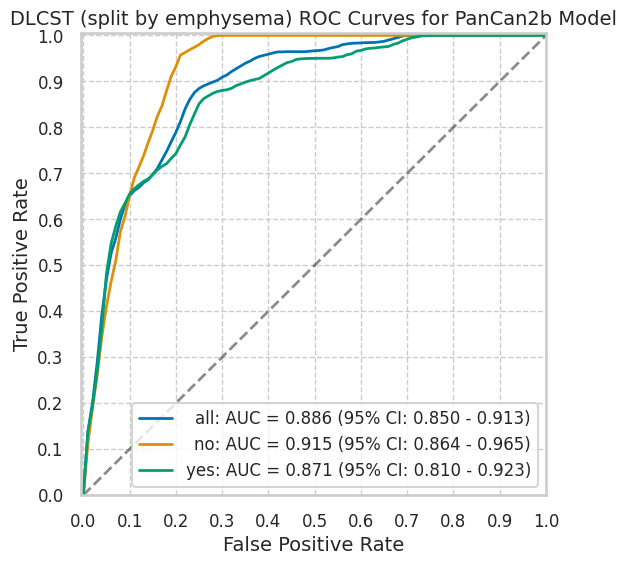

In [52]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "emphysema", model=m)

no, n=497, 43 malignant (8.65%)
yes, n=102, 16 malignant (15.69%)


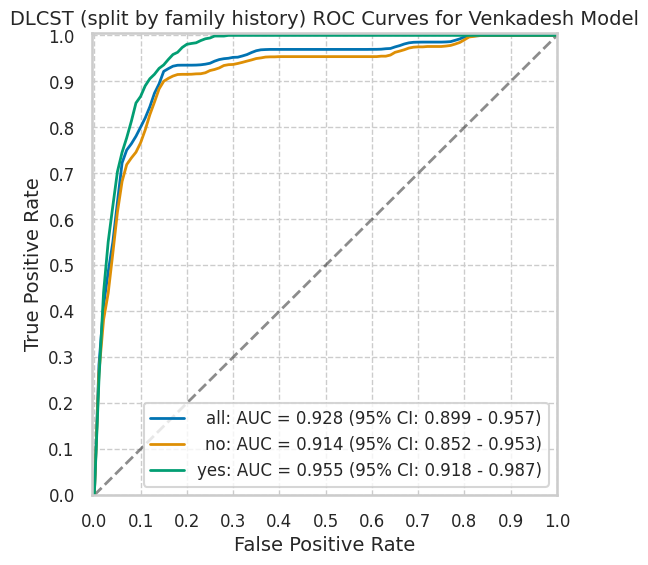

no, n=497, 43 malignant (8.65%)
yes, n=102, 16 malignant (15.69%)


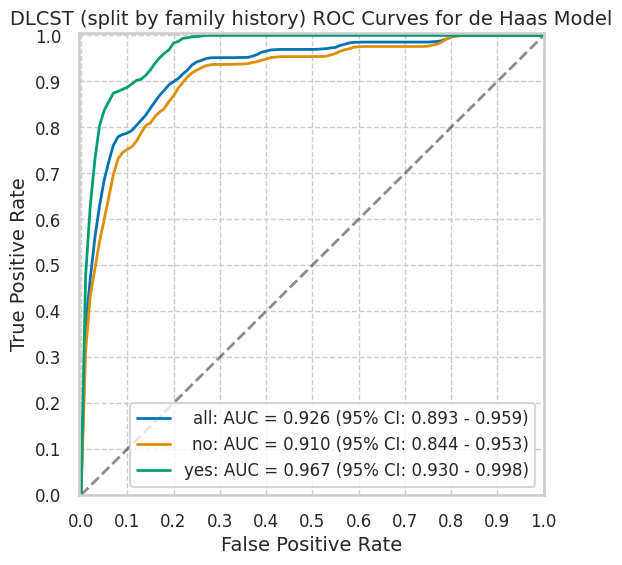

no, n=497, 43 malignant (8.65%)
yes, n=102, 16 malignant (15.69%)


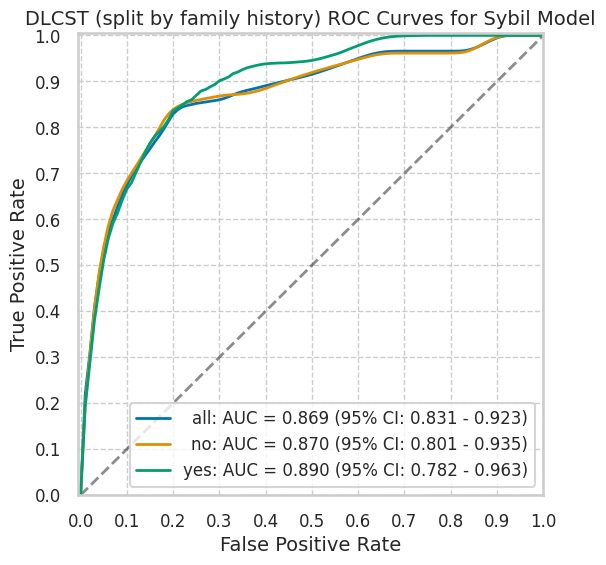

no, n=497, 43 malignant (8.65%)
yes, n=102, 16 malignant (15.69%)


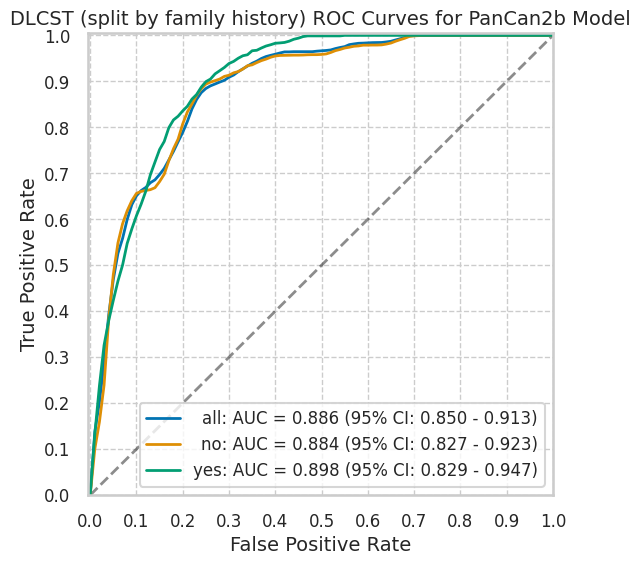

In [53]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "family history", model=m)

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


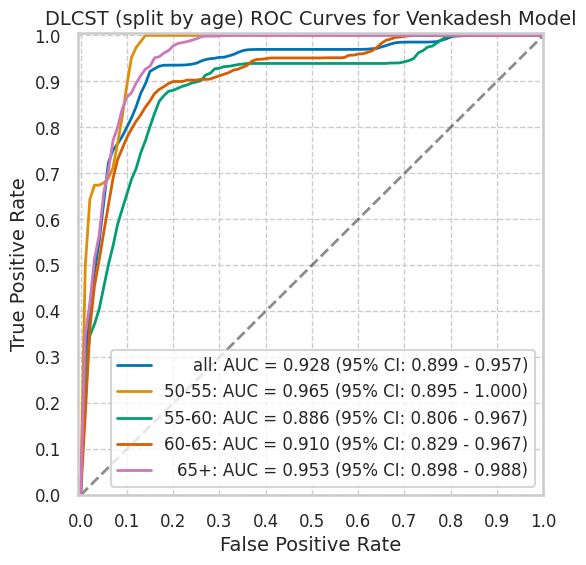

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


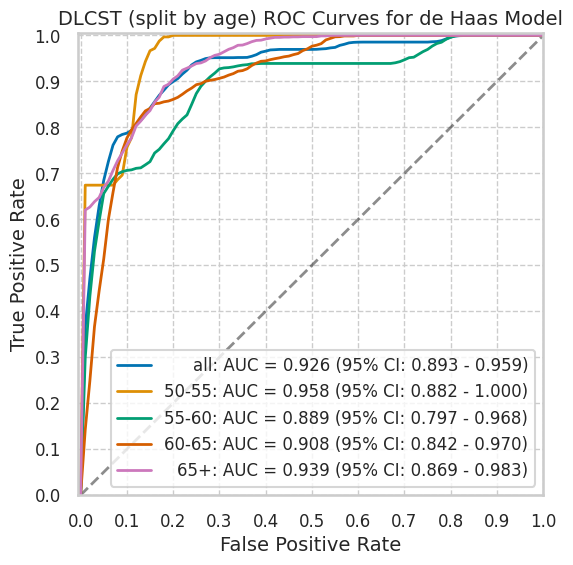

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


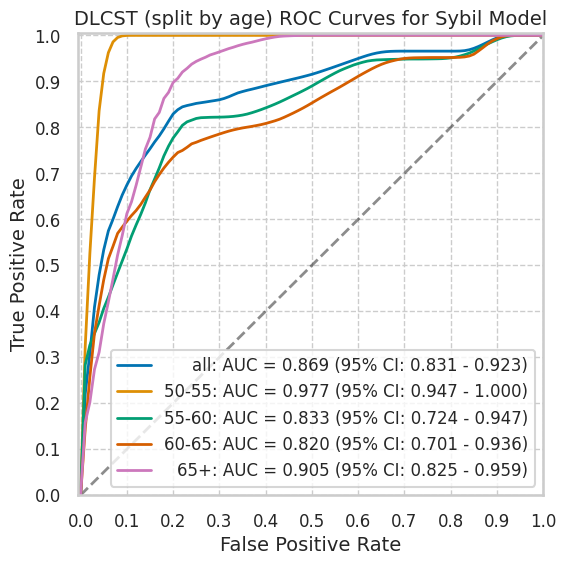

50-55, n=153, 3 malignant (1.96%)
55-60, n=186, 17 malignant (9.14%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


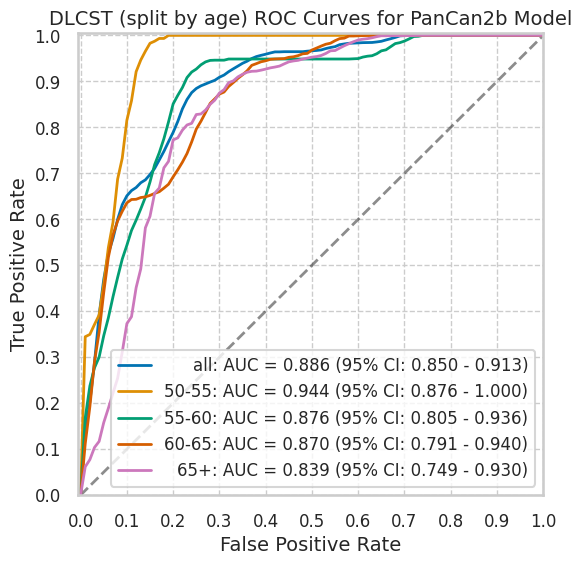

In [54]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "age", model=m)

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


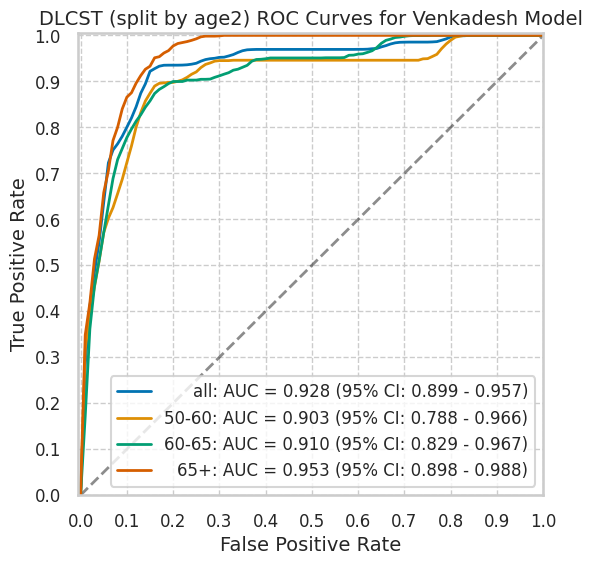

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


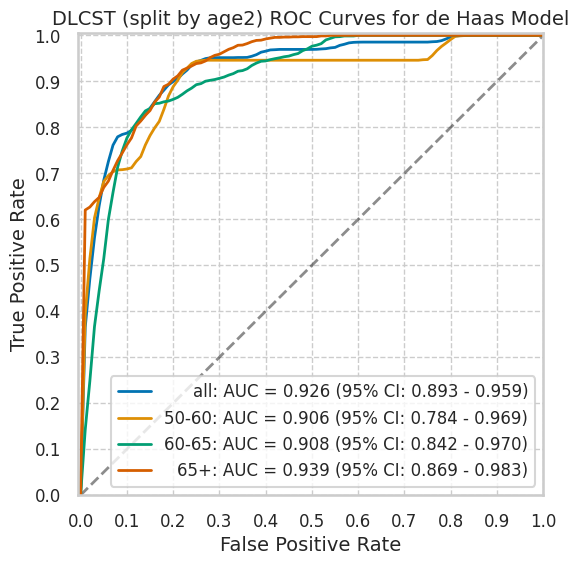

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


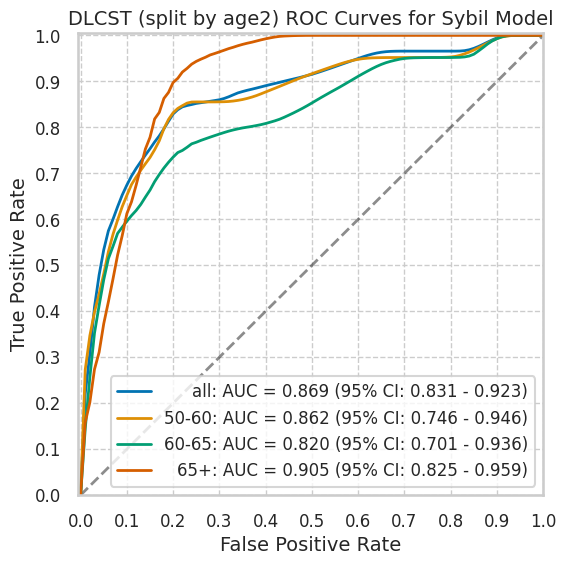

50-60, n=339, 20 malignant (5.90%)
60-65, n=193, 20 malignant (10.36%)
65+, n=67, 19 malignant (28.36%)


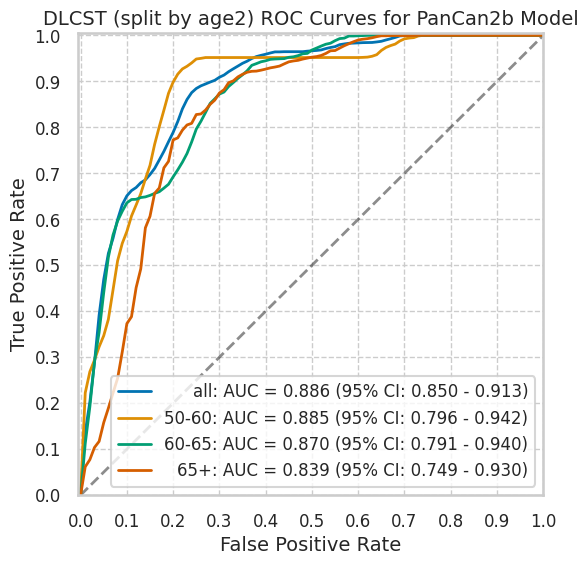

In [55]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "age2", model=m)

50-62, n=435, 28 malignant (6.44%)
62+, n=164, 31 malignant (18.90%)


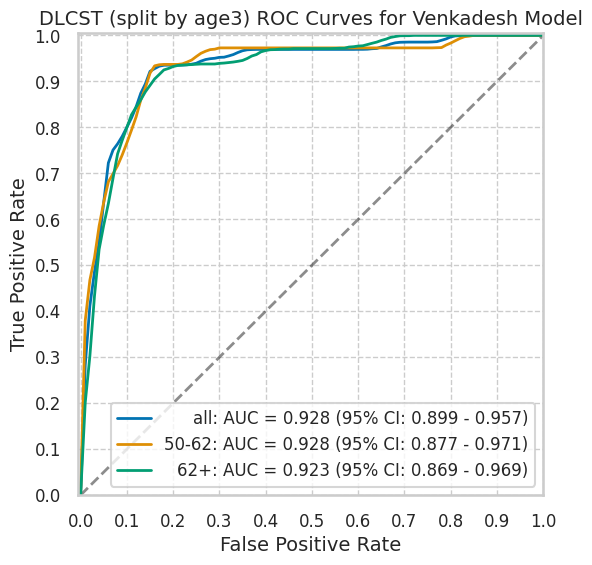

50-62, n=435, 28 malignant (6.44%)
62+, n=164, 31 malignant (18.90%)


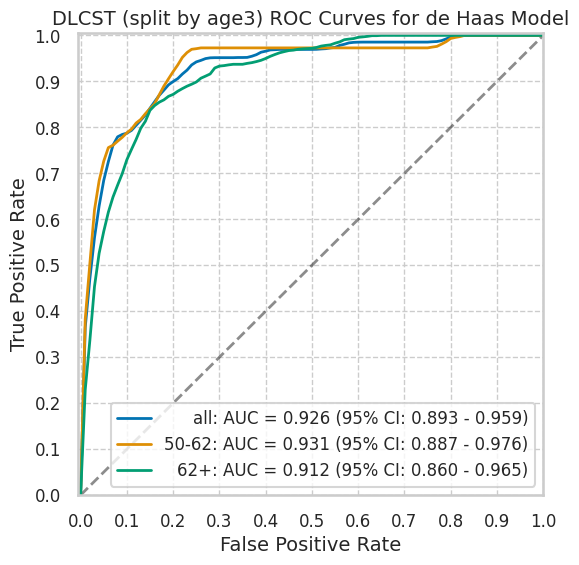

50-62, n=435, 28 malignant (6.44%)
62+, n=164, 31 malignant (18.90%)


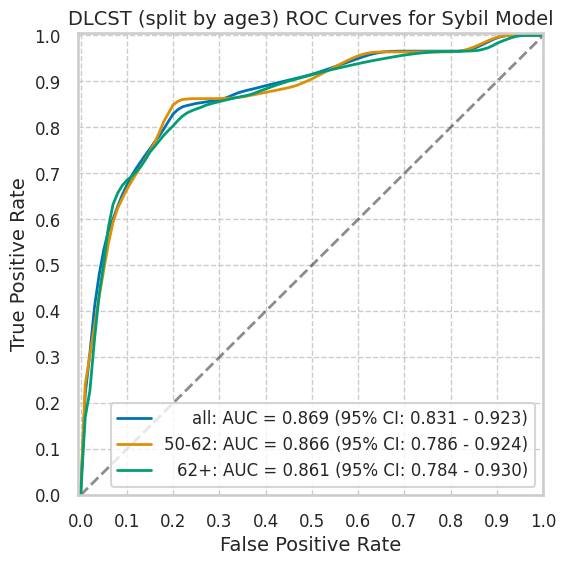

50-62, n=435, 28 malignant (6.44%)
62+, n=164, 31 malignant (18.90%)


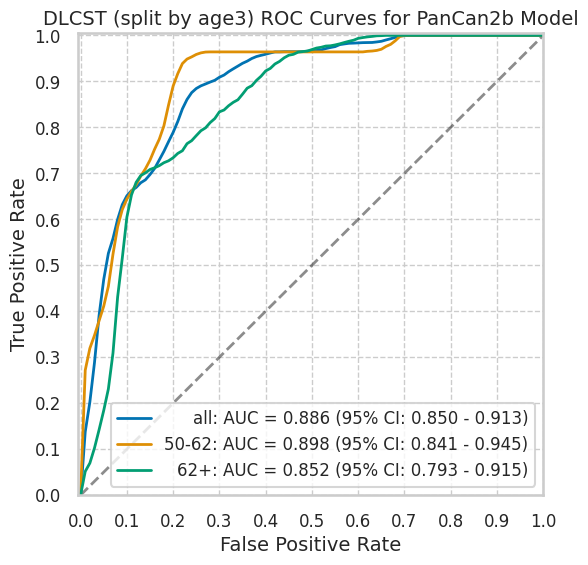

In [62]:
for m in MODEL_TO_COL.keys():
    rocs_splits(df_results, "age3", model=m)